<a href="https://colab.research.google.com/github/anandasuryaa13/RecommenderSystemTA/blob/main/TA_Surya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tahap 1: PreProcessing Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel ('/content/frozenfood.xlsx')
df.head()

,TGL,KODEBARA,NAMABARA,QTY,SATUAN,HARGA,JUMLAH,NAMA
0,2020-04-01,JOF-022,JOFRANS NUGGET AYAM REG. 225 GR X 24 PAK,1,DUS,240000,240000,F - (MITRAKU) TOKO SALMAINI HABABAHAN
1,2020-04-01,JOF-002,JOFRANS NUGGET AYAM REG. 500 GR X 12 PAK,1,DUS,216000,216000,F - (MITRAKU) TOKO SALMAINI HABABAHAN
2,2020-04-01,OKEY-003,OKEY STICK 500 GR X 10 PACK,1,DUS,190000,190000,F - (MITRAKU) TOKO SALMAINI HABABAHAN
3,2020-04-01,OKEY-001,OKEY SOSIS 500 GR X 20 PACK,1,DUS,380000,380000,F - (MITRAKU) TOKO SALMAINI HABABAHAN
4,2020-04-01,BLF-001,BELFOODS SOSIS AYAM 500 GR X 12 PACK,1,DUS,204000,204000,F - (MITRAKU) TOKO SALMAINI HABABAHAN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6778 entries, 0 to 6777
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   TGL       6778 non-null   datetime64[ns]
 1   KODEBARA  6778 non-null   object        
 2   NAMABARA  6778 non-null   object        
 3   QTY       6778 non-null   int64         
 4   SATUAN    6778 non-null   object        
 5   HARGA     6778 non-null   int64         
 6   JUMLAH    6778 non-null   int64         
 7   NAMA      6778 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 423.8+ KB


In [4]:
# Cek missing value
df.isnull().sum()

,0
TGL,0
KODEBARA,0
NAMABARA,0
QTY,0
SATUAN,0
HARGA,0
JUMLAH,0
NAMA,0


In [5]:
df.dropna(inplace=True)
df['TGL'] = pd.to_datetime(df['TGL']) # convert ke tipe date

In [6]:
df_duplicate = df.copy()

In [13]:
# Label Encoding
le_nama = LabelEncoder()
df_duplicate['NAMA_encoded'] = le_nama.fit_transform(df_duplicate['NAMA'])
le_kodebara = LabelEncoder()
df_duplicate['KODEBARA_encoded'] = le_kodebara.fit_transform(df_duplicate['KODEBARA'])
le_brand = LabelEncoder()
df_duplicate['BRAND_encoded'] = le_brand.fit_transform(df_duplicate['Brand'])

In [15]:
# Hitung Frekuensi Transaksi
df_duplicate['Transaction_Count'] = 1  # Setiap baris transaksi dihitung sebagai 1

In [16]:
# Split data into train and test
train_df, test_df = train_test_split(df_duplicate, test_size=0.2, random_state=42)

# Tahap 2: Eksplorasi Data

In [114]:
# Statistik deskriptif untuk kolom numerik
numeric_stats = df_duplicate[['QTY', 'HARGA', 'Total_Spending', 'QTY_normalized', 'HARGA_normalized', 'KODEBARA_encoded', 'NAMA_encoded']].describe()
numeric_stats

,QTY,HARGA,Total_Spending,QTY_normalized,HARGA_normalized,KODEBARA_encoded,NAMA_encoded
count,6778.000000,6.778000e+03,6.778000e+03,6778.000000,6778.000000,6778.000000,6778.000000
mean,6.890528,1.509717e+05,6.690421e+05,0.014763,0.058790,141.258631,107.909413
std,13.598410,1.481454e+05,1.929417e+06,0.034081,0.057689,72.838211,73.326325
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.800000e+04,1.150000e+05,0.000000,0.007009,72.000000,48.000000
50%,3.000000,1.300000e+05,2.400000e+05,0.005013,0.050623,157.000000,108.000000
75%,7.000000,2.400000e+05,5.520000e+05,0.015038,0.093458,206.000000,171.000000
max,400.000000,2.568000e+06,6.320000e+07,1.000000,1.000000,267.000000,228.000000


In [84]:
# Frekuensi untuk kolom kategorikal
print("Distribusi KODEBARA:")
print(df_duplicate['KODEBARA'].value_counts())

print("\nDistribusi SATUAN:")
print(df_duplicate['SATUAN'].value_counts())

print("\nDistribusi NAMA:")
print(df_duplicate['NAMA'].value_counts())

Distribusi KODEBARA:
KODEBARA
MIN-001      378
OKEY-001     288
OKEY-003     278
JOF-023      244
JOF-024      217
            ... 
TUSUK-001      1
SHIF-010       1
DORI-002       1
EURO-003       1
BER-004        1
Name: count, Length: 268, dtype: int64

Distribusi SATUAN:
SATUAN
DUS     3097
PACK    2837
PAIL     510
BAL      155
BKS       87
PCS       58
PAC       18
JRG       11
BALL       5
Name: count, dtype: int64

Distribusi NAMA:
NAMA
CASH                                  656
TOKO CITA RASA BARU                   432
AL - AMANAH FROZEN                    354
ADEK FROZEN                           202
F - (MITRAKU) PT. DINAMIKA BUAH N.    190
                                     ... 
C - MALINDO BUKIT TINGGI                1
Y - IBUK CAROLINA NAGA MAS              1
C - BENGKALIS FROZEN FOOD               1
OPUNG SIANTAR                           1
MIAMI - WARDI                           1
Name: count, Length: 229, dtype: int64


Jumlah Pembelian per Bulan:
Bulan
4    6388
5    6994
6    7748
7    9978
8    8293
9    7303
Name: QTY, dtype: int64

Jumlah Pembelian per Tahun:
Tahun
2020    46704
Name: QTY, dtype: int64


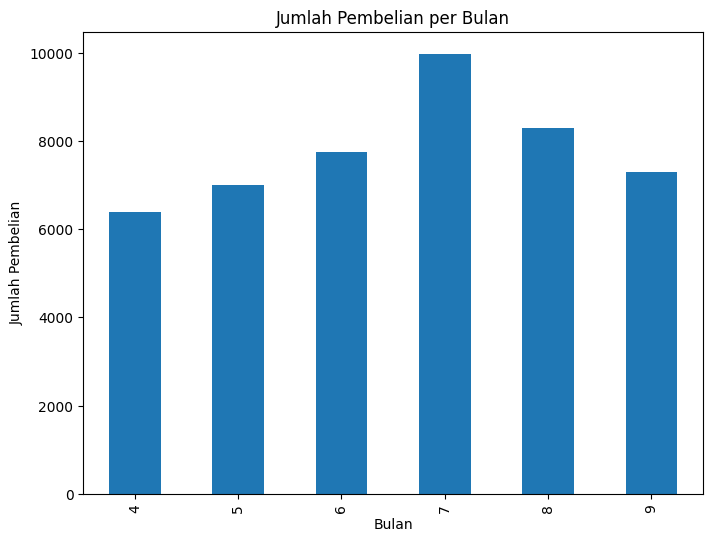

In [85]:
# Analisis berdasarkan tanggal
df_duplicate['Bulan'] = df_duplicate['TGL'].dt.month  # Ekstrak bulan
df_duplicate['Tahun'] = df_duplicate['TGL'].dt.year  # Ekstrak tahun

# Jumlah pembelian per bulan
purchase_by_month = df_duplicate.groupby('Bulan')['QTY'].sum()
print("Jumlah Pembelian per Bulan:")
print(purchase_by_month)

# Jumlah pembelian per tahun
purchase_by_year = df_duplicate.groupby('Tahun')['QTY'].sum()
print("\nJumlah Pembelian per Tahun:")
print(purchase_by_year)

# Bar plot untuk jumlah pembelian per bulan
plt.figure(figsize=(8, 6))
purchase_by_month.plot(kind='bar')
plt.title('Jumlah Pembelian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.show()

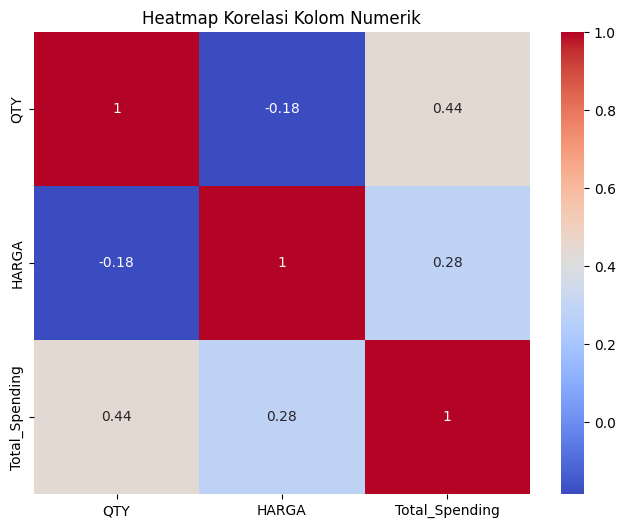

In [89]:
# Heatmap untuk korelasi kolom numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df_duplicate[['QTY', 'HARGA', 'Total_Spending']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Kolom Numerik')
plt.show()

# Tahap 3: Membangun Matriks


In [17]:
# User-Item Matrix
user_item_matrix = train_df.pivot_table(index='NAMA_encoded', columns='KODEBARA_encoded', values='Transaction_Count', aggfunc='count', fill_value=0)
item_user_matrix = user_item_matrix.T
brand_user_matrix = train_df.pivot_table(index='NAMA_encoded', columns='BRAND_encoded', values='Transaction_Count', aggfunc='count', fill_value=0)

# Tahap 4: Menghitung Similarity

In [18]:
# Similarity Calculations
user_similarity = cosine_similarity(user_item_matrix)
item_similarity = cosine_similarity(item_user_matrix)
brand_similarity = cosine_similarity(brand_user_matrix)

# Tahap 5: Implementasi KNN


In [215]:
# KNN Models
model_knn_users = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=min(8, len(user_item_matrix)))
model_knn_users.fit(user_item_matrix)

model_knn_items = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=min(8, len(item_user_matrix)))
model_knn_items.fit(item_user_matrix)

model_knn_brands = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=min(8, len(brand_user_matrix)))
model_knn_brands.fit(brand_user_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=8)

# Tahap 6: Membuat Rekomendasi


In [255]:
# Recommendation Functions
def recommend_by_user(selected_items, user_item_matrix, model_knn, similarity_matrix, top_n=5, threshold=0.5):
    relevant_users = set()
    for item in selected_items:
        if item in user_item_matrix.columns:
            buyers = user_item_matrix[user_item_matrix[item] > 0].index.tolist()
            relevant_users.update(buyers)

    if not relevant_users:
        return []

    recommended_items = Counter()
    user_indices = list(user_item_matrix.index)
    similarity_df = pd.DataFrame(similarity_matrix, index=user_indices, columns=user_indices)

    for user_id in relevant_users:
        if user_id in user_indices:
            distances, indices = model_knn.kneighbors(user_item_matrix.loc[user_id].values.reshape(1, -1), n_neighbors=min(top_n+1, len(user_indices)))
            for neighbor_idx in indices.flatten()[1:]:
                if 0 <= neighbor_idx < len(user_indices):
                    neighbor_id = user_indices[neighbor_idx]
                    if neighbor_id in similarity_df.index and similarity_df.loc[user_id, neighbor_id] > threshold:
                        purchased_items = user_item_matrix.loc[neighbor_id]
                        for item, value in purchased_items[purchased_items > 0].items():
                            recommended_items[item] += value

    return [item for item, _ in recommended_items.most_common(top_n)]

In [256]:
def recommend_by_item(selected_items, item_user_matrix, model_knn, top_n=5):
    if not selected_items:
        return []

    recommended_items = Counter()

    for item in selected_items:
        if item in item_user_matrix.index:
            distances, indices = model_knn.kneighbors(item_user_matrix.loc[item].values.reshape(1, -1), n_neighbors=min(top_n+1, len(item_user_matrix)))
            for idx in indices.flatten()[1:]:
                neighbor_item = item_user_matrix.index[idx]
                recommended_items[neighbor_item] += 1

    return [item for item, _ in recommended_items.most_common(top_n)]

In [257]:
def recommend_by_brand(selected_items, brand_user_matrix, user_item_matrix, top_n=5):
    if not selected_items:
        return []

    selected_brands = train_df[train_df['KODEBARA_encoded'].isin(selected_items)]['BRAND_encoded'].unique()
    if len(selected_brands) == 0:
        return []

    recommended_items = Counter()

    for brand in selected_brands:
        if brand in brand_user_matrix.columns:
            users = brand_user_matrix[brand_user_matrix[brand] > 0].index.tolist()
            for user_id in users:
                purchased_items = user_item_matrix.loc[user_id]
                for item, value in purchased_items[purchased_items > 0].items():
                    recommended_items[item] += value

    return [item for item, _ in recommended_items.most_common(top_n)]

# Tahap 6: Evaluasi Model

In [258]:
def evaluate_recommendations(selected_items, recommendations, test_df):
    # Cari semua pengguna yang pernah membeli produk dalam selected_items
    relevant_users = test_df[test_df['KODEBARA_encoded'].isin(selected_items)]['NAMA_encoded'].unique()

    if len(relevant_users) == 0:
        return 0, 0, 0  # Jika tidak ada user terkait di test_df, evaluasi tidak bisa dilakukan

    total_precision, total_recall, total_f1 = 0, 0, 0
    count = 0

    for user_id in relevant_users:
        actual_purchases = set(test_df[test_df['NAMA_encoded'] == user_id]['KODEBARA_encoded'].unique())
        recommended_items = set(recommendations)

        true_positives = len(recommended_items.intersection(actual_purchases))
        precision = true_positives / len(recommended_items) if len(recommended_items) > 0 else 0
        recall = true_positives / len(actual_purchases) if len(actual_purchases) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        total_precision += precision
        total_recall += recall
        total_f1 += f1_score
        count += 1

    return total_precision / count, total_recall / count, total_f1 / count if count > 0 else (0, 0, 0)

In [259]:
# Example Usage
selected_items = [2, 12, 10, 99, 129, 150]  # Produk yang dipilih user

user_recommendations = recommend_by_user(selected_items, user_item_matrix, model_knn_users, user_similarity)
item_recommendations = recommend_by_item(selected_items, item_user_matrix, model_knn_items)
brand_recommendations = recommend_by_brand(selected_items, brand_user_matrix, user_item_matrix)

print("Rekomendasi berdasarkan User Similarity:", user_recommendations)
print("Rekomendasi berdasarkan Item Similarity:", item_recommendations)
print("Rekomendasi berdasarkan Brand Similarity:", brand_recommendations)

Rekomendasi berdasarkan User Similarity: [227, 183, 229, 129, 32]
Rekomendasi berdasarkan Item Similarity: [105, 106, 82, 19, 87]
Rekomendasi berdasarkan Brand Similarity: [183, 129, 227, 130, 229]


In [260]:
# Evaluasi untuk masing-masing preferensi berdasarkan selected_items
user_precision, user_recall, user_f1 = evaluate_recommendations(selected_items, user_recommendations, test_df)
item_precision, item_recall, item_f1 = evaluate_recommendations(selected_items, item_recommendations, test_df)
brand_precision, brand_recall, brand_f1 = evaluate_recommendations(selected_items, brand_recommendations, test_df)

print("Evaluasi User Similarity: Precision=", user_precision, "Recall=", user_recall, "F1-score=", user_f1)
print("Evaluasi Item Similarity: Precision=", item_precision, "Recall=", item_recall, "F1-score=", item_f1)
print("Evaluasi Brand Similarity: Precision=", brand_precision, "Recall=", brand_recall, "F1-score=", brand_f1)


Evaluasi User Similarity: Precision= 0.36190476190476195 Recall= 0.2781179356491241 F1-score= 0.2529122907552688
Evaluasi Item Similarity: Precision= 0.014285714285714287 Recall= 0.002819548872180451 F1-score= 0.00433721875847113
Evaluasi Brand Similarity: Precision= 0.38095238095238093 Recall= 0.28483686843296563 F1-score= 0.2621552501261054


In [262]:
final_recommendations = list(set(user_recommendations + item_recommendations + brand_recommendations))
precision, recall, f1 = evaluate_recommendations(selected_items, final_recommendations, test_df)

print("Evaluasi Kombinasi Rekomendasi: Precision=", precision, "Recall=", recall, "F1-score=", f1)

Evaluasi Kombinasi Rekomendasi: Precision= 0.1969696969696969 Recall= 0.30222111070387314 F1-score= 0.19320212203969825
